<a href="https://colab.research.google.com/github/tejasgholap45/Machine-Learning-/blob/main/Native_Bayes_ML_Day2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
len(df[df['Outcome']==0])

500

In [ ]:
len(df[df['Outcome']==1])

268

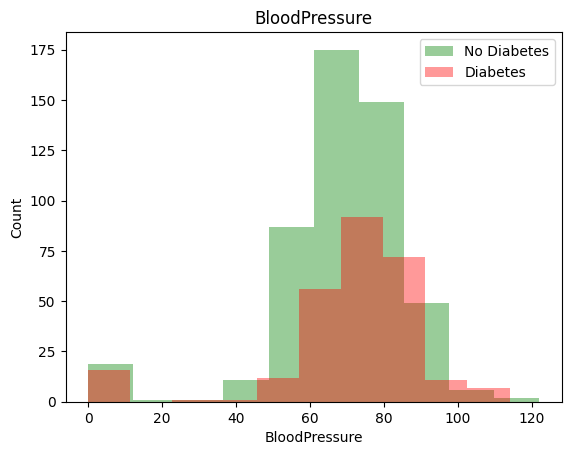

In [ ]:
plt.hist(df[df['Outcome']==0]['BloodPressure'],color = "Green",alpha = 0.4,label="No Diabetes")
plt.hist(df[df['Outcome']==1]['BloodPressure'],color = "Red",alpha = 0.4,label="Diabetes")
plt.title('BloodPressure')
plt.xlabel('BloodPressure')
plt.ylabel("Count")
plt.legend()

In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

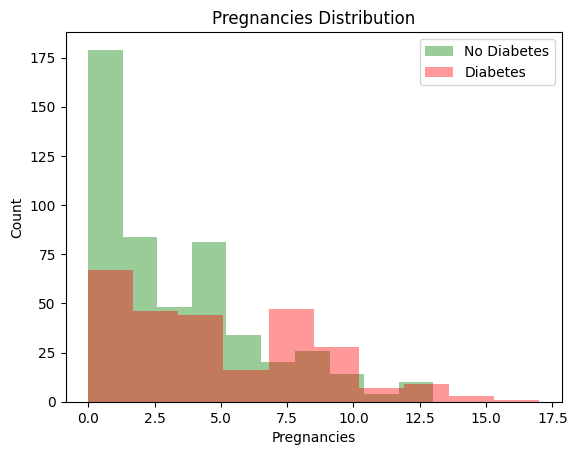

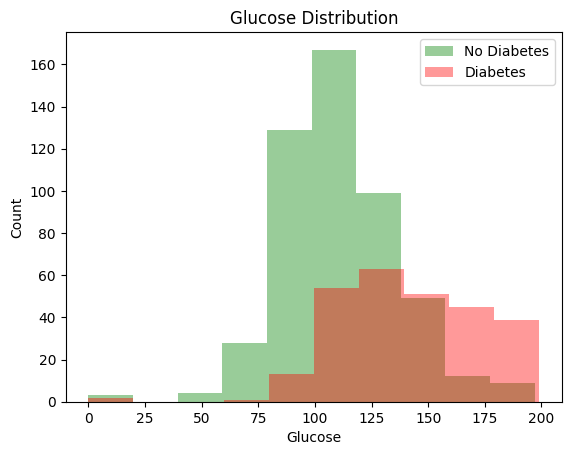

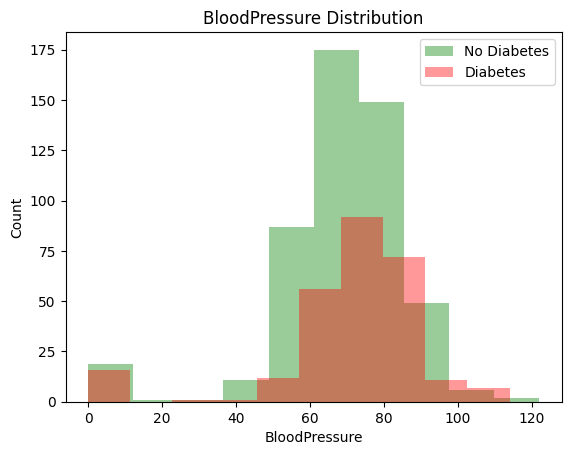

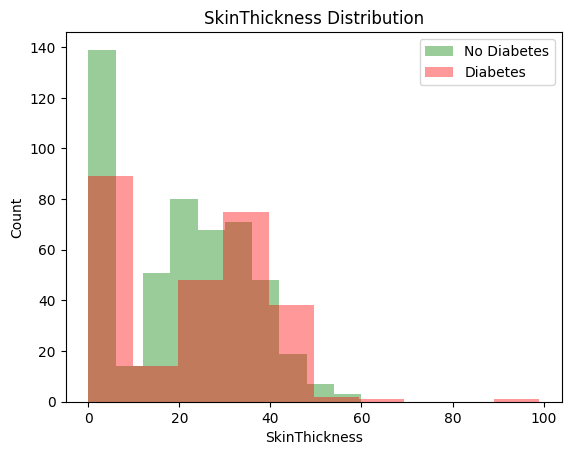

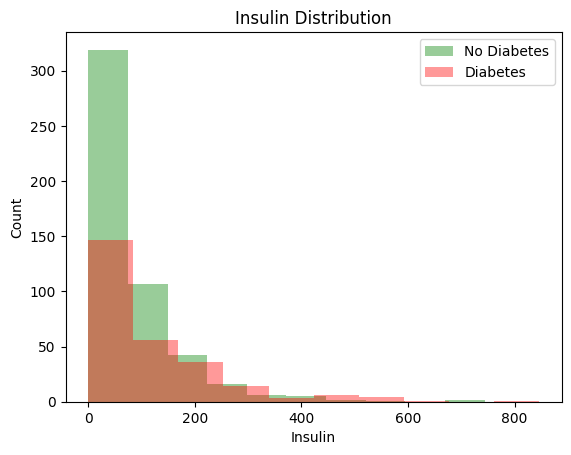

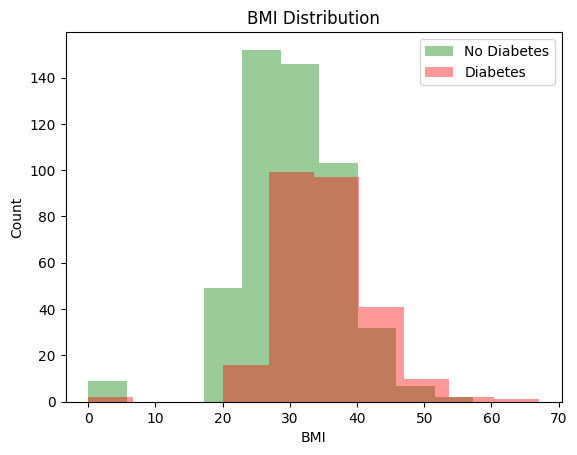

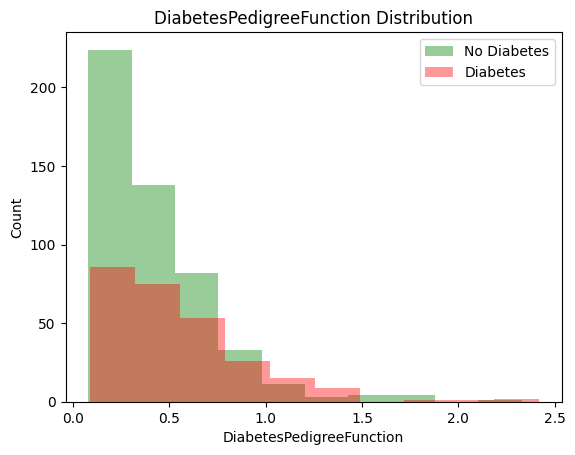

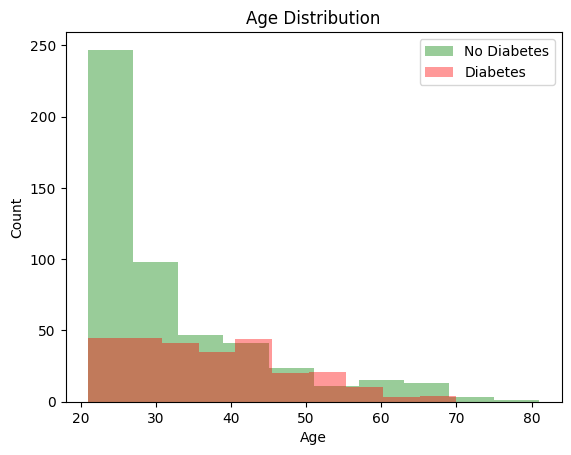

In [ ]:
for col in df.columns[:-1]:
  plt.hist(df[df['Outcome']==0][col],color = "Green",alpha = 0.4,label="No Diabetes")
  plt.hist(df[df['Outcome']==1][col],color = "Red",alpha = 0.4,label="Diabetes")
  plt.title(col + " Distribution")
  plt.xlabel(col)
  plt.ylabel("Count")
  plt.legend()
  plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
# ML


#x and y

x = df[df.columns[:-1]]
y = df.Outcome

In [ ]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [ ]:
y

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


In [ ]:
#train test splits?


x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=23)


In [ ]:
x_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
714,3,102,74,0,0,29.5,0.121,32
302,5,77,82,41,42,35.8,0.156,35
133,8,84,74,31,0,38.3,0.457,39
728,2,175,88,0,0,22.9,0.326,22
558,11,103,68,40,0,46.2,0.126,42
...,...,...,...,...,...,...,...,...
31,3,158,76,36,245,31.6,0.851,28
488,4,99,72,17,0,25.6,0.294,28
40,3,180,64,25,70,34.0,0.271,26
742,1,109,58,18,116,28.5,0.219,22


In [ ]:
x_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
93,4,134,72,0,0,23.8,0.277,60
228,4,197,70,39,744,36.7,2.329,31
424,8,151,78,32,210,42.9,0.516,36
635,13,104,72,0,0,31.2,0.465,38
684,5,136,82,0,0,0.0,0.640,69
...,...,...,...,...,...,...,...,...
733,2,106,56,27,165,29.0,0.426,22
570,3,78,70,0,0,32.5,0.270,39
148,5,147,78,0,0,33.7,0.218,65
758,1,106,76,0,0,37.5,0.197,26


In [ ]:
# call the model 🤙🏼📞
# GaussianNB() thiis iis new model
model_knn =  KNeighborsClassifier()
model_NB  = GaussianNB()

In [ ]:
#Train the model 🤖
model_knn.fit(x_train,y_train)
model_NB.fit(x_train,y_train)

GaussianNB()

In [ ]:
#testing the models 🧪⚒️

y_pred_knn =  model_knn.predict(x_test)

y_pred_NB =  model_NB.predict(x_test)

In [ ]:
#Evaluation


print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.82      0.83      0.82       101
           1       0.67      0.64      0.65        53

    accuracy                           0.77       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.77      0.77       154



In [ ]:
print(classification_report(y_test,y_pred_NB))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85       101
           1       0.71      0.74      0.72        53

    accuracy                           0.81       154
   macro avg       0.78      0.79      0.79       154
weighted avg       0.81      0.81      0.81       154



In [ ]:
df['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


In [ ]:
#NB cha confusion

confusion_matrix(y_test,y_pred_NB)


array([[85, 16],
       [14, 39]])

In [ ]:
(85 + 39)/(85+16+14+39)

0.8051948051948052

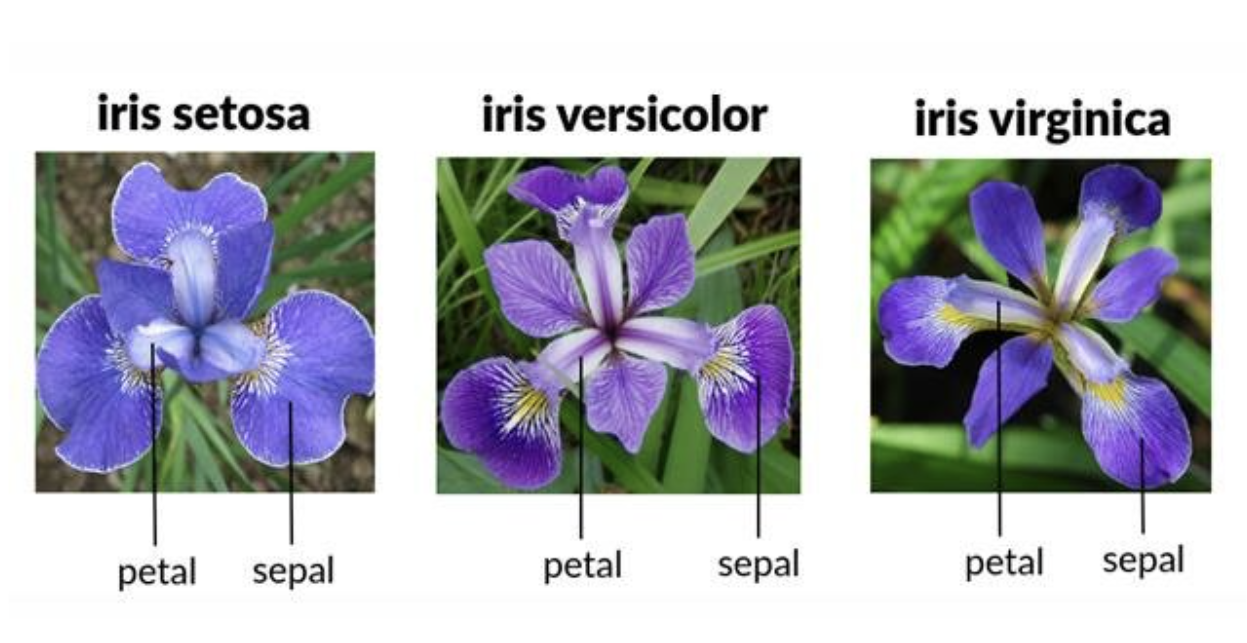

In [ ]:
# ==================testing ===================


import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/iris")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'iris' dataset.
Path to dataset files: /kaggle/input/iris


In [ ]:
df = pd.read_csv(f"{path}/Iris.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
